# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import cv2 as cv
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import  Input , Dense ,Conv2D , MaxPooling2D ,RandomTranslation , RandomFlip , RandomRotation,RandomZoom ,BatchNormalization ,Flatten , Rescaling , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

2024-03-08 15:43:26.448841: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 15:43:26.877696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 15:43:26.877795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 15:43:26.955782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 15:43:27.119644: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 15:43:27.121425: I tensorflow/core/platform/cpu_feature_guard.cc:1

# images path

In [2]:
data_path = "./archive/Breast Cancer/train"
data_path

'./archive/Breast Cancer/train'

In [3]:
train_batches , val_batches = image_dataset_from_directory(
                                data_path,
                                batch_size=64,
                                image_size=(224,224),
                                labels = "inferred",
                                label_mode="int",
                                validation_split=.2,
                                subset="both",
                                seed=0
)
    

Found 7000 files belonging to 2 classes.
Using 5600 files for training.
Using 1400 files for validation.


In [4]:
test_path = "./archive/Breast Cancer/test"
test_path

'./archive/Breast Cancer/test'

In [5]:
test_batches = image_dataset_from_directory(
                                            test_path,
                                            batch_size=64,
                                            image_size=(224,224),
                                            seed=0
)

Found 1500 files belonging to 2 classes.


In [6]:
np.shape(train_batches)

()

In [7]:
train_batches

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Building Model

In [8]:
model = Sequential([
    Rescaling((1/255)),
    Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=((224, 224, 3))),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid'),
])

In [9]:
model.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
                  optimizer=Adam(learning_rate=0.001))

# Training the Model

In [10]:
history = model.fit(train_batches, epochs=50,  validation_data=val_batches)

Epoch 1/50


2024-03-05 20:09:04.343604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 207 of 512
2024-03-05 20:09:18.223136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.
2024-03-05 20:09:20.764175: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1644167168 exceeds 10% of free system memory.
2024-03-05 20:09:28.275570: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 822083584 exceeds 10% of free system memory.
2024-03-05 20:09:28.275777: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1644167168 exceeds 10% of free system memory.


 1/88 [..............................] - ETA: 58:53 - loss: 0.9211 - accuracy: 0.4062

2024-03-05 20:09:34.065925: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1644167168 exceeds 10% of free system memory.
2024-03-05 20:09:42.577603: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 822083584 exceeds 10% of free system memory.


88/88 [==============================] - 1214s 13s/step - loss: 0.6868 - accuracy: 0.5398 - val_loss: 0.6157 - val_accuracy: 0.6921
Epoch 2/50


2024-03-05 20:29:17.667856: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 195 of 512
2024-03-05 20:29:31.695901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1198s 13s/step - loss: 0.3985 - accuracy: 0.8305 - val_loss: 0.3725 - val_accuracy: 0.8807
Epoch 3/50


2024-03-05 20:49:16.065288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 188 of 512
2024-03-05 20:49:31.437080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1236s 14s/step - loss: 0.2997 - accuracy: 0.8868 - val_loss: 0.2931 - val_accuracy: 0.8979
Epoch 4/50


2024-03-05 21:09:52.041183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 187 of 512
2024-03-05 21:10:02.037459: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 397 of 512
2024-03-05 21:10:06.913108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1196s 13s/step - loss: 0.2995 - accuracy: 0.8855 - val_loss: 0.3207 - val_accuracy: 0.8943
Epoch 5/50


2024-03-05 21:29:48.265906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-05 21:29:58.383117: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 404 of 512
2024-03-05 21:30:03.276986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1227s 14s/step - loss: 0.2951 - accuracy: 0.8886 - val_loss: 0.2671 - val_accuracy: 0.9114
Epoch 6/50


2024-03-05 21:50:15.213752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 193 of 512
2024-03-05 21:50:25.249027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 394 of 512
2024-03-05 21:50:30.209823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1207s 13s/step - loss: 0.2837 - accuracy: 0.8888 - val_loss: 0.2608 - val_accuracy: 0.9036
Epoch 7/50


2024-03-05 22:10:22.091789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 193 of 512
2024-03-05 22:10:36.821693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1203s 13s/step - loss: 0.2653 - accuracy: 0.8961 - val_loss: 0.2341 - val_accuracy: 0.9114
Epoch 8/50


2024-03-05 22:30:25.332090: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-05 22:30:35.350955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 397 of 512
2024-03-05 22:30:40.274394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1224s 14s/step - loss: 0.2262 - accuracy: 0.9114 - val_loss: 0.2061 - val_accuracy: 0.9221
Epoch 9/50


2024-03-05 22:50:49.485062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 193 of 512
2024-03-05 22:51:04.519209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1209s 13s/step - loss: 0.2113 - accuracy: 0.9186 - val_loss: 0.1874 - val_accuracy: 0.9293
Epoch 10/50


2024-03-05 23:10:58.368041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 198 of 512
2024-03-05 23:11:12.401521: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1227s 14s/step - loss: 0.1903 - accuracy: 0.9264 - val_loss: 0.1821 - val_accuracy: 0.9257
Epoch 11/50


2024-03-05 23:31:25.914932: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 199 of 512
2024-03-05 23:31:35.963037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 425 of 512
2024-03-05 23:31:39.808342: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1188s 13s/step - loss: 0.1663 - accuracy: 0.9389 - val_loss: 0.1721 - val_accuracy: 0.9364
Epoch 12/50


2024-03-05 23:51:14.431221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-05 23:51:24.452136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 421 of 512
2024-03-05 23:51:28.178246: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1197s 13s/step - loss: 0.1696 - accuracy: 0.9345 - val_loss: 0.1633 - val_accuracy: 0.9407
Epoch 13/50


2024-03-06 00:11:10.949188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 187 of 512
2024-03-06 00:11:20.975177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 392 of 512
2024-03-06 00:11:26.521907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1209s 13s/step - loss: 0.1628 - accuracy: 0.9425 - val_loss: 0.1341 - val_accuracy: 0.9507
Epoch 14/50


2024-03-06 00:31:19.817986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 00:31:35.251288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1277s 14s/step - loss: 0.1565 - accuracy: 0.9416 - val_loss: 0.1627 - val_accuracy: 0.9379
Epoch 15/50


2024-03-06 00:52:36.675700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 187 of 512
2024-03-06 00:52:52.016146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1314s 15s/step - loss: 0.1456 - accuracy: 0.9443 - val_loss: 0.1609 - val_accuracy: 0.9464
Epoch 16/50


2024-03-06 01:14:31.232669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 01:14:46.491032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1220s 14s/step - loss: 0.1412 - accuracy: 0.9479 - val_loss: 0.1494 - val_accuracy: 0.9436
Epoch 17/50


2024-03-06 01:34:50.915104: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 186 of 512
2024-03-06 01:35:00.935005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 391 of 512
2024-03-06 01:35:06.294840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1199s 13s/step - loss: 0.1236 - accuracy: 0.9552 - val_loss: 0.1323 - val_accuracy: 0.9636
Epoch 18/50


2024-03-06 01:54:50.221333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 210 of 512
2024-03-06 01:55:04.541838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1207s 13s/step - loss: 0.1205 - accuracy: 0.9559 - val_loss: 0.1392 - val_accuracy: 0.9336
Epoch 19/50


2024-03-06 02:14:56.863906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 181 of 512
2024-03-06 02:15:06.884231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 386 of 512
2024-03-06 02:15:12.301838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1197s 13s/step - loss: 0.1125 - accuracy: 0.9584 - val_loss: 0.1124 - val_accuracy: 0.9564
Epoch 20/50


2024-03-06 02:34:53.790548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 02:35:08.800738: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1229s 14s/step - loss: 0.1078 - accuracy: 0.9568 - val_loss: 0.0853 - val_accuracy: 0.9657
Epoch 21/50


2024-03-06 02:55:23.029179: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-06 02:55:38.083075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1170s 13s/step - loss: 0.0848 - accuracy: 0.9679 - val_loss: 0.0754 - val_accuracy: 0.9729
Epoch 22/50


2024-03-06 03:14:52.624112: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-06 03:15:02.649812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 406 of 512
2024-03-06 03:15:07.381569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1190s 13s/step - loss: 0.1201 - accuracy: 0.9541 - val_loss: 0.1057 - val_accuracy: 0.9593
Epoch 23/50


2024-03-06 03:34:42.923330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 03:34:57.906754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1191s 13s/step - loss: 0.0854 - accuracy: 0.9695 - val_loss: 0.0719 - val_accuracy: 0.9721
Epoch 24/50


2024-03-06 03:54:34.135999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 03:54:44.217442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 397 of 512
2024-03-06 03:54:48.887175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1213s 13s/step - loss: 0.0740 - accuracy: 0.9691 - val_loss: 0.0989 - val_accuracy: 0.9586
Epoch 25/50


2024-03-06 04:14:47.029650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 181 of 512
2024-03-06 04:15:02.784328: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1171s 13s/step - loss: 0.0723 - accuracy: 0.9748 - val_loss: 0.0573 - val_accuracy: 0.9764
Epoch 26/50


2024-03-06 04:34:18.402830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 171 of 512
2024-03-06 04:34:35.249399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1227s 14s/step - loss: 0.0859 - accuracy: 0.9657 - val_loss: 0.0570 - val_accuracy: 0.9771
Epoch 27/50


2024-03-06 04:54:45.948722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 04:55:01.193682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1188s 13s/step - loss: 0.0804 - accuracy: 0.9711 - val_loss: 0.0549 - val_accuracy: 0.9786
Epoch 28/50


2024-03-06 05:14:33.733633: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 186 of 512
2024-03-06 05:14:44.148912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 386 of 512
2024-03-06 05:14:49.783341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1200s 13s/step - loss: 0.0690 - accuracy: 0.9741 - val_loss: 0.0604 - val_accuracy: 0.9779
Epoch 29/50


2024-03-06 05:34:34.252446: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 05:34:44.284751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 389 of 512
2024-03-06 05:34:49.374906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1195s 13s/step - loss: 0.0564 - accuracy: 0.9786 - val_loss: 0.0874 - val_accuracy: 0.9636
Epoch 30/50


2024-03-06 05:54:28.921264: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 193 of 512
2024-03-06 05:54:38.978259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 403 of 512
2024-03-06 05:54:43.482838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1220s 14s/step - loss: 0.0586 - accuracy: 0.9784 - val_loss: 0.0555 - val_accuracy: 0.9793
Epoch 31/50


2024-03-06 06:14:48.906992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 195 of 512
2024-03-06 06:15:03.341989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1238s 14s/step - loss: 0.0654 - accuracy: 0.9752 - val_loss: 0.0525 - val_accuracy: 0.9814
Epoch 32/50


2024-03-06 06:35:27.128741: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 06:35:42.097555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1216s 14s/step - loss: 0.0565 - accuracy: 0.9773 - val_loss: 0.0405 - val_accuracy: 0.9857
Epoch 33/50


2024-03-06 06:55:43.160716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 188 of 512
2024-03-06 06:55:58.945482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1221s 13s/step - loss: 0.0559 - accuracy: 0.9784 - val_loss: 0.0545 - val_accuracy: 0.9800
Epoch 34/50


2024-03-06 07:16:04.111418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 07:16:14.123791: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 399 of 512
2024-03-06 07:16:19.342724: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1219s 13s/step - loss: 0.0590 - accuracy: 0.9764 - val_loss: 0.0542 - val_accuracy: 0.9779
Epoch 35/50


2024-03-06 07:36:22.948093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 187 of 512
2024-03-06 07:36:32.978759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 380 of 512
2024-03-06 07:36:38.670128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1221s 14s/step - loss: 0.0510 - accuracy: 0.9802 - val_loss: 0.0451 - val_accuracy: 0.9821
Epoch 36/50


2024-03-06 07:56:43.913084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 07:56:59.290466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1213s 13s/step - loss: 0.0501 - accuracy: 0.9812 - val_loss: 0.0741 - val_accuracy: 0.9736
Epoch 37/50


2024-03-06 08:16:56.904631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 188 of 512
2024-03-06 08:17:07.023975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 389 of 512
2024-03-06 08:17:12.485063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1213s 13s/step - loss: 0.0438 - accuracy: 0.9841 - val_loss: 0.0354 - val_accuracy: 0.9850
Epoch 38/50


2024-03-06 08:37:10.223475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 08:37:25.413849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1229s 14s/step - loss: 0.0462 - accuracy: 0.9818 - val_loss: 0.0580 - val_accuracy: 0.9771
Epoch 39/50


2024-03-06 08:57:39.831805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-06 08:57:55.233925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1235s 14s/step - loss: 0.0465 - accuracy: 0.9823 - val_loss: 0.0701 - val_accuracy: 0.9764
Epoch 40/50


2024-03-06 09:18:15.214998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-06 09:18:31.038376: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1217s 13s/step - loss: 0.0391 - accuracy: 0.9843 - val_loss: 0.0477 - val_accuracy: 0.9836
Epoch 41/50


2024-03-06 09:38:31.970338: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 190 of 512
2024-03-06 09:38:47.060065: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1227s 14s/step - loss: 0.0500 - accuracy: 0.9809 - val_loss: 0.0622 - val_accuracy: 0.9736
Epoch 42/50


2024-03-06 09:58:59.200546: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 193 of 512
2024-03-06 09:59:09.262216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 403 of 512
2024-03-06 09:59:13.809955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1216s 13s/step - loss: 0.0562 - accuracy: 0.9798 - val_loss: 0.0437 - val_accuracy: 0.9829
Epoch 43/50


2024-03-06 10:19:15.134505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 196 of 512
2024-03-06 10:19:25.303808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 421 of 512
2024-03-06 10:19:28.972291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1227s 14s/step - loss: 0.0415 - accuracy: 0.9836 - val_loss: 0.0358 - val_accuracy: 0.9843
Epoch 44/50


2024-03-06 10:39:41.723436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 188 of 512
2024-03-06 10:39:51.762439: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 396 of 512
2024-03-06 10:39:56.921371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1207s 13s/step - loss: 0.0410 - accuracy: 0.9852 - val_loss: 0.0526 - val_accuracy: 0.9814
Epoch 45/50


2024-03-06 10:59:48.623779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 217 of 512
2024-03-06 10:59:58.653866: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 434 of 512
2024-03-06 11:00:02.052425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1210s 13s/step - loss: 0.0415 - accuracy: 0.9852 - val_loss: 0.0550 - val_accuracy: 0.9807
Epoch 46/50


2024-03-06 11:19:58.473926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 11:20:13.362199: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1278s 14s/step - loss: 0.0361 - accuracy: 0.9861 - val_loss: 0.0563 - val_accuracy: 0.9850
Epoch 47/50


2024-03-06 11:41:16.266522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 191 of 512
2024-03-06 11:41:31.392015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1210s 13s/step - loss: 0.0505 - accuracy: 0.9791 - val_loss: 0.0390 - val_accuracy: 0.9843
Epoch 48/50


2024-03-06 12:01:26.084215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 189 of 512
2024-03-06 12:01:40.343921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1208s 13s/step - loss: 0.0571 - accuracy: 0.9787 - val_loss: 0.0617 - val_accuracy: 0.9750
Epoch 49/50


2024-03-06 12:21:34.340849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 197 of 512
2024-03-06 12:21:49.395292: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1232s 14s/step - loss: 0.0511 - accuracy: 0.9807 - val_loss: 0.0405 - val_accuracy: 0.9864
Epoch 50/50


2024-03-06 12:42:06.469903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 198 of 512
2024-03-06 12:42:16.557826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:8: Filling up shuffle buffer (this may take a while): 406 of 512
2024-03-06 12:42:20.981797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 1202s 13s/step - loss: 0.0365 - accuracy: 0.9845 - val_loss: 0.0475 - val_accuracy: 0.9843


# Chick Model Loss

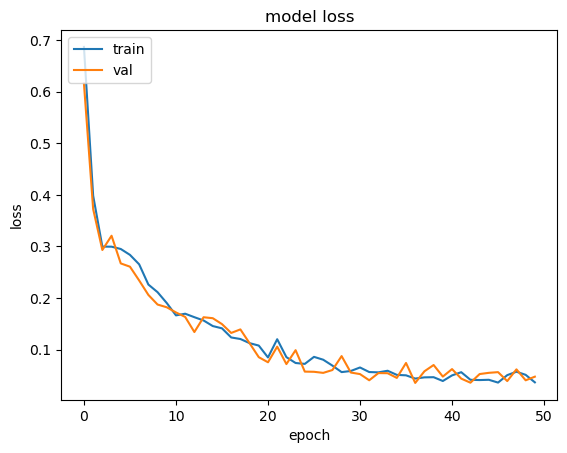

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Chikc Model Accuracy

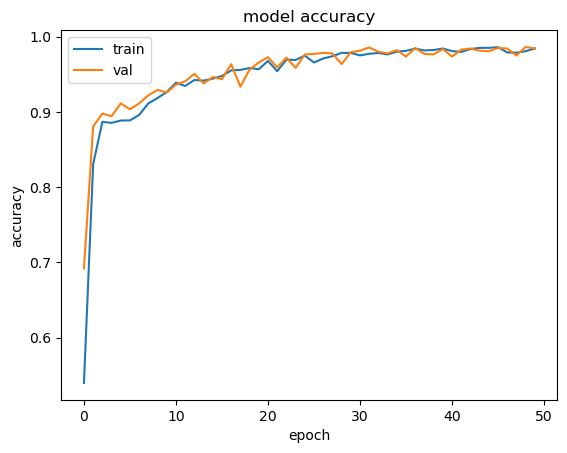

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate The Model

In [18]:
model.evaluate(train_batches )

2024-03-06 21:18:12.397714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


88/88 [==============================] - 278s 3s/step - loss: 0.0151 - accuracy: 0.9955


[0.0151302395388484, 0.9955357313156128]

In [20]:
model.evaluate(val_batches)

22/22 [==============================] - 242s 11s/step - loss: 0.0475 - accuracy: 0.9843


[0.04751022160053253, 0.9842857122421265]

In [19]:
model.evaluate(test_batches )

2024-03-06 21:23:24.820804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


24/24 [==============================] - 265s 10s/step - loss: 0.0562 - accuracy: 0.9787


[0.05619367957115173, 0.9786666631698608]

# Saving Model

In [13]:
model.save("breast_canser22.h5")

In [14]:
model.save("breast_canser22.keras")

In [16]:
model.save("breast_canser22.pkl")

INFO:tensorflow:Assets written to: breast_canser22.pkl/assets


INFO:tensorflow:Assets written to: breast_canser22.pkl/assets


In [2]:
new_model = tf.keras.models.load_model('breast_canser22.keras')


In [3]:
from keras.preprocessing import image

# malignant

In [7]:
imag_path = "testing/malignant/breast_malignant_0210.jpg"

In [8]:
test_image = tf.keras.utils.load_img(imag_path,target_size=(224,224))  
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = new_model.predict(test_image)

1/1 [==============================] - 0s 49ms/step


2024-03-08 15:51:42.446506: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.


In [9]:
print(result[0])

[0.99704385]


# bening

In [21]:
imag_path2 = "testing/bening/breast_benign_0023.jpg"

In [22]:
test_image2 = tf.keras.utils.load_img(imag_path2,target_size=(224,224))  
test_image2 = tf.keras.utils.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)

#predict the result
result2 = new_model.predict(test_image2)

1/1 [==============================] - 0s 52ms/step


In [23]:
print(result2[0])

[6.745419e-14]


# GREAT JOB